In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential

In [ ]:

k=pd.read_csv("stock_price.csv")
print(k)

           Date       Close
0    2022-01-01  122.103338
1    2022-01-02   91.196124
2    2022-01-03  156.762160
3    2022-01-04  134.254688
4    2022-01-05  153.043709
..          ...         ...
360  2022-12-27  132.522630
361  2022-12-28  187.594322
362  2022-12-29  161.268416
363  2022-12-30   86.049856
364  2022-12-31  161.197317

[365 rows x 2 columns]


In [ ]:
k.shape

(365, 2)

In [ ]:
k.head(5)

,Date,Close
0,2022-01-01,122.103338
1,2022-01-02,91.196124
2,2022-01-03,156.762160
3,2022-01-04,134.254688
4,2022-01-05,153.043709


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['Date'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['Close', 'Date'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_4, *['Date', 'Close', 'Date'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['Date', 'count()', 'Date'], **{})
chart

In [ ]:
k.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
prices=k["Close"].values
prices=prices.reshape(-1,1)

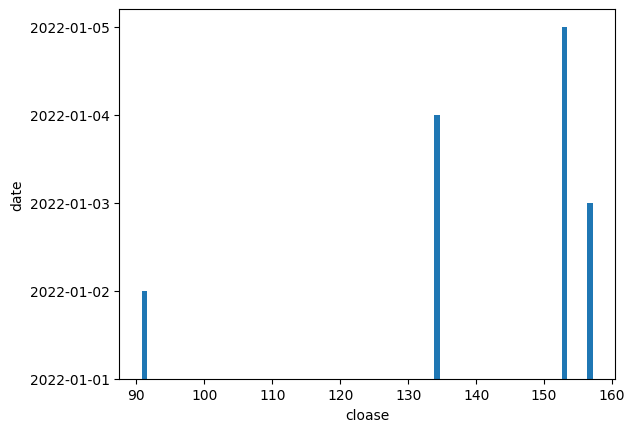

In [ ]:
x4=k["Close"].head()
y4=k["Date"].head()
plt.bar(x4,y4)
plt.xlabel("cloase")
plt.ylabel("date")
plt.show()

(array([1., 0., 0., 0., 1., 0., 1., 0., 0., 2.]),
 array([ 91.19612375,  97.75272735, 104.30933096, 110.86593456,
        117.42253816, 123.97914177, 130.53574537, 137.09234897,
        143.64895258, 150.20555618, 156.76215978]),
 <BarContainer object of 10 artists>)

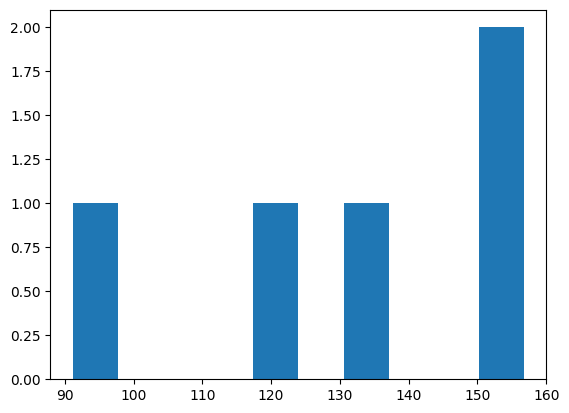

In [ ]:
plt.hist(x4)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_prices=scaler.fit_transform(prices)

In [ ]:
print(scaler)
print(scaled_prices)

MinMaxScaler()
[[4.80617626e-01]
 [2.73820770e-01]
 [7.12516081e-01]
 [5.61921001e-01]
 [6.87636327e-01]
 [4.08699893e-01]
 [4.81744634e-01]
 [4.18232032e-01]
 [7.62752919e-02]
 [9.35803187e-02]
 [5.19274642e-01]
 [5.03944694e-01]
 [8.45704046e-01]
 [3.90216953e-01]
 [1.00000000e+00]
 [2.91097696e-01]
 [4.83093025e-01]
 [3.99551057e-01]
 [7.70589581e-01]
 [7.80817075e-01]
 [6.17993872e-02]
 [2.80925724e-01]
 [9.27277084e-01]
 [4.39961050e-01]
 [4.18192520e-01]
 [9.75696335e-01]
 [2.18258916e-02]
 [2.55334147e-01]
 [1.43248530e-02]
 [3.42487566e-01]
 [9.80708304e-01]
 [9.75961447e-01]
 [2.66918979e-01]
 [2.83423123e-01]
 [4.49590826e-01]
 [2.51879081e-01]
 [6.21320287e-01]
 [9.46128890e-01]
 [6.65710582e-01]
 [6.42952362e-01]
 [3.73059794e-01]
 [6.43399216e-01]
 [3.20741377e-01]
 [5.68018641e-01]
 [3.42665958e-04]
 [6.73903309e-01]
 [7.31093718e-01]
 [9.00002921e-01]
 [4.13283473e-01]
 [8.50733769e-01]
 [9.57186051e-02]
 [3.91194842e-01]
 [4.05727138e-03]
 [2.87158270e-01]
 [5.17027256e

In [ ]:
train_size=int(len(scaled_prices)*0.8)
test_size=len(scaled_prices)-train_size
train_data,test_data=scaled_prices[0:train_size,:],scaled_prices[train_size:len(scaled_prices), :]

In [ ]:
#function to create the lstm
def create_sequence(data,seq_length):
  x=[]
  y=[]
  for i in range(len(data)-seq_length):
    x.append(data[i:i+seq_length,0])
    y.append(data[i+seq_length,0])
    return np.array(x),np.array(y)


In [ ]:
sequence_length=60
#now create training and tsting
x_train,y_train=create_sequence(train_data,60)
x_test,y_test=create_sequence(test_data,60)
print("x_train data",x_train)
print("y_train data",y_train)
print("x_test data",x_test)
print("y_test data",y_test)

x_train data [[4.80617626e-01 2.73820770e-01 7.12516081e-01 5.61921001e-01
  6.87636327e-01 4.08699893e-01 4.81744634e-01 4.18232032e-01
  7.62752919e-02 9.35803187e-02 5.19274642e-01 5.03944694e-01
  8.45704046e-01 3.90216953e-01 1.00000000e+00 2.91097696e-01
  4.83093025e-01 3.99551057e-01 7.70589581e-01 7.80817075e-01
  6.17993872e-02 2.80925724e-01 9.27277084e-01 4.39961050e-01
  4.18192520e-01 9.75696335e-01 2.18258916e-02 2.55334147e-01
  1.43248530e-02 3.42487566e-01 9.80708304e-01 9.75961447e-01
  2.66918979e-01 2.83423123e-01 4.49590826e-01 2.51879081e-01
  6.21320287e-01 9.46128890e-01 6.65710582e-01 6.42952362e-01
  3.73059794e-01 6.43399216e-01 3.20741377e-01 5.68018641e-01
  3.42665958e-04 6.73903309e-01 7.31093718e-01 9.00002921e-01
  4.13283473e-01 8.50733769e-01 9.57186051e-02 3.91194842e-01
  4.05727138e-03 2.87158270e-01 5.17027256e-01 2.16559041e-01
  2.92634329e-01 7.14344000e-01 2.76410467e-01 1.76512383e-01]]
y_train data [0.96343999]
x_test data [[0.71969367 0.42

# New Section

In [ ]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(sequence_length,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer="adam",loss="accuracy_score")

In [ ]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

1/1 [==============================] - 2s 2s/step


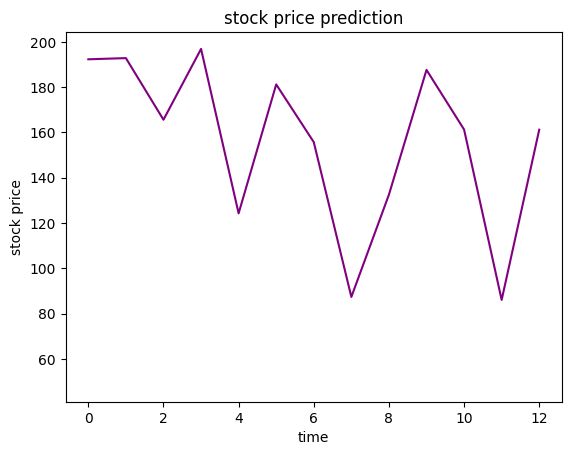

In [ ]:
#now plot the graph
plt.plot(prices[train_size+sequence_length:],color="purple",label="actualpage")
plt.plot(predictions,color='red',label="predicted price")
plt.xlabel("time")
plt.ylabel("stock price")
plt.title("stock price prediction")
plt.show()